In [1]:
#Importing required libraries

import tensorflow
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Activation
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
import numpy as np

In [2]:
#Loading data

(x_train,y_train),(x_test,y_test)=tensorflow.keras.datasets.mnist.load_data()

#scaling data

x_train=x_train/255
x_test=x_test/255

#Reshaping the dimension

xtrain=x_train.reshape(60000,28,28,1)
xtest=x_test.reshape(10000,28,28,1)


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#First convolutional layer

model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(xtrain[0].shape)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#second convolutional layer

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third convolutional layer
          
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
          
#First dense layer
          
model.add(Dense(64))
model.add(Activation("relu"))

#Second dense layer
          
model.add(Dense(32))
model.add(Activation("relu"))
          
#Output layer

model.add(Dense(10))
model.add(Activation("softmax"))

In [4]:
#Compling the model

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [5]:
#Training the model

model.fit(xtrain,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 86s 45ms/step - loss: 0.2285 - accuracy: 0.9274
Epoch 2/15
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0746 - accuracy: 0.9774
Epoch 3/15
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0544 - accuracy: 0.9833
Epoch 4/15
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0427 - accuracy: 0.9869
Epoch 5/15
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0350 - accuracy: 0.9887
Epoch 6/15
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0276 - accuracy: 0.9913
Epoch 7/15
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 8/15
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 9/15
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 10/15
1875/1875 [==============================] - 89s 48m

In [6]:
model.evaluate(xtest,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0647 - accuracy: 0.9857


[0.06473201513290405, 0.9857000112533569]

In [7]:
import cv2

In [22]:
image=cv2.imread("three.png")

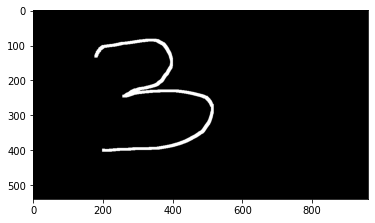

In [23]:
plt.imshow(image)

In [24]:
image.shape

(540, 960, 3)

In [32]:
def smart(im):
  image=cv2.imread(im)
  img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  new=cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)
  final=tensorflow.keras.utils.normalize(new)
  result=final.reshape(-1,28,28,1)
  m=model.predict(result)
  return np.argmax(m)


In [35]:
smart("three.png")

3

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    